# Thinkful Unit 4 - K-Means Drill

In [5]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

## Reading in Data

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

## Preprocessing & Modeling

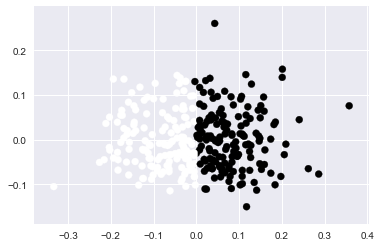

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [32]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.60396039603960394

### Identifying best K (trial & error) 

In [48]:
clusters = list(range(2,6))
num_clusters = []
accuracy_scores = []

In [49]:
for i in clusters: 
    y_pred = KMeans(n_clusters=i, random_state=42).fit_predict(X_pca)
    num_clusters.append(i)
    accuracy_scores.append(accuracy_score(y,y_pred))

In [57]:
results = pd.DataFrame()
results['Number of Clusters'] = clusters
results['Model Accuracy'] = accuracy_scores

In [58]:
results

,Number of Clusters,Model Accuracy
0,2,0.603960
1,3,0.415842
2,4,0.353135
3,5,0.089109


In [8]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        0  140
1      149   14


## Observations

As discussed in the curriculum, selecting the best K is often through trial & error. While it's perfectly plausible that 2+ clusters may map better to a binary outcome -- yielding higher accuracy scores -- in this case, the best accuracy was achieved through just 2 clusters. In cases where data are less sparse/have higher dimensions, multiple clusters may offer more precision and thus better accuracy. 